In [1]:
from google.colab import drive
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np

In [2]:
drive.mount('/content/drive')
train_df=pd.read_csv('/content/drive/My Drive/Participants_Data_TGIH/Train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
test_df=pd.read_csv('/content/drive/My Drive/Participants_Data_TGIH/Test.csv')

In [4]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [5]:
train_df.isnull().values.any()

False

In [6]:
train_df.shape

(284780, 8)

In [7]:
train_df['InvoiceNo'].unique().shape

(20971,)

In [8]:
train_df['StockCode'].unique().shape

(3619,)

In [9]:
train_df['Description'].unique().shape

(3819,)

In [10]:
train_df['CustomerID'].unique().shape

(4339,)

In [11]:
train_df['Country'].unique().shape

(37,)

In [12]:
train_df['InvoiceDate']=pd.to_datetime(train_df['InvoiceDate'])
train_df['InvoiceDay']=train_df['InvoiceDate'].dt.day
train_df['InvoiceMonth']=train_df['InvoiceDate'].dt.month
train_df['InvoiceYear']=train_df['InvoiceDate'].dt.year
train_df['InvoiceHour']=train_df['InvoiceDate'].dt.hour

In [13]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,6,5,2011,16
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,11,5,2011,7
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,20,11,2011,13
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,22,11,2011,12
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,6,5,2011,9


In [14]:
train_df['InvoiceYear'].unique()

array([2011, 2010])

In [15]:
train_df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846,15.030318,7.612922,2010.933910,12.738064
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602,8.652114,3.415785,0.248439,2.288886
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000,1.000000,1.000000,2010.000000,6.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000,7.000000,5.000000,2011.000000,11.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000,15.000000,8.000000,2011.000000,13.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000,22.000000,11.000000,2011.000000,14.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000,31.000000,12.000000,2011.000000,20.000000


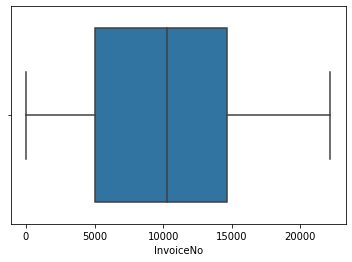

In [16]:
sns.boxplot(x=train_df['InvoiceNo'])

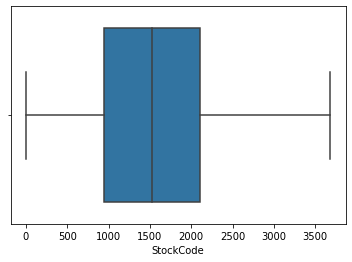

In [17]:
sns.boxplot(x=train_df['StockCode'])

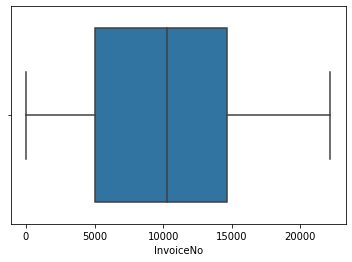

In [18]:
sns.boxplot(x=train_df['InvoiceNo'])

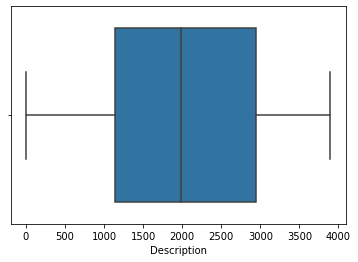

In [19]:
sns.boxplot(x=train_df['Description'])

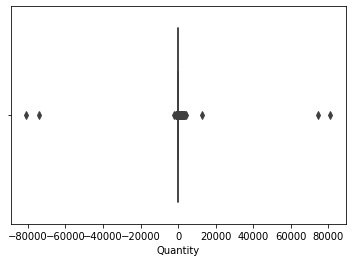

In [20]:
sns.boxplot(x=train_df['Quantity'])

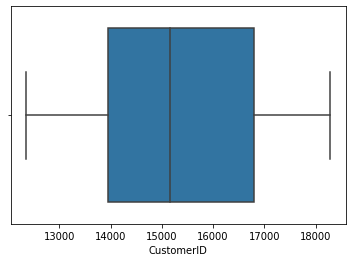

In [21]:
sns.boxplot(x=train_df['CustomerID'])

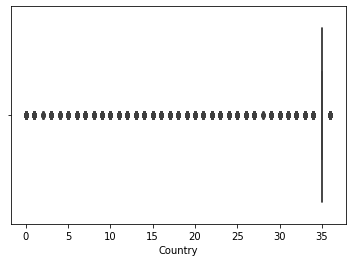

In [22]:
sns.boxplot(x=train_df['Country'])

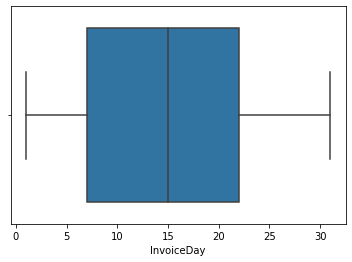

In [23]:
sns.boxplot(x=train_df['InvoiceDay'])

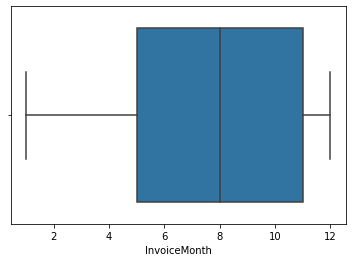

In [24]:
sns.boxplot(x=train_df['InvoiceMonth'])

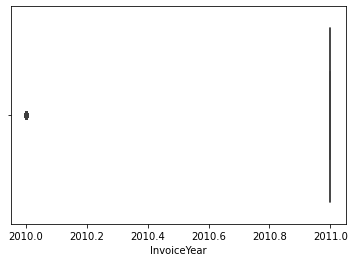

In [25]:
sns.boxplot(x=train_df['InvoiceYear'])

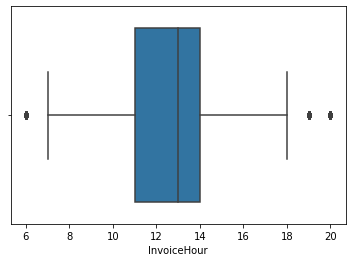

In [26]:
sns.boxplot(x=train_df['InvoiceHour'])

In [27]:
train_df[train_df['InvoiceYear']==2010]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
19,262,787,2601,24,2010-12-03 09:51:00,0.42,12686.0,13,3,12,2010,9
21,888,439,3369,8,2010-12-12 16:05:00,1.25,17618.0,35,12,12,2010,16
33,472,1607,3285,12,2010-12-06 14:19:00,0.85,16817.0,35,6,12,2010,14
37,401,3156,1161,5,2010-12-05 16:41:00,0.85,12748.0,35,5,12,2010,16
48,832,2844,2880,4,2010-12-10 13:48:00,2.55,16727.0,35,10,12,2010,13
...,...,...,...,...,...,...,...,...,...,...,...,...
284723,385,285,67,2,2010-12-05 15:12:00,1.25,15889.0,35,5,12,2010,15
284733,863,1176,1610,4,2010-12-12 12:00:00,1.25,17372.0,35,12,12,2010,12
284741,375,1369,2009,4,2010-12-05 14:02:00,4.95,12647.0,14,5,12,2010,14
284758,1088,1014,2934,3,2010-12-15 14:45:00,4.95,15641.0,35,15,12,2010,14


In [28]:
train_df[train_df['InvoiceHour']<=8]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,11,5,2011,7
11,4993,1236,1802,4,2011-04-08 08:20:00,4.25,13015.0,35,8,4,2011,8
53,15741,1084,865,4,2011-11-09 08:36:00,3.95,13046.0,35,9,11,2011,8
85,16163,1838,3063,8,2011-11-14 08:41:00,1.48,17450.0,35,14,11,2011,8
86,13344,1050,2578,24,2011-10-05 08:17:00,0.42,17728.0,35,5,10,2011,8
...,...,...,...,...,...,...,...,...,...,...,...,...
284455,7097,1325,2145,6,2011-05-24 08:49:00,2.95,13523.0,35,24,5,2011,8
284465,13679,2314,2588,12,2011-10-10 08:58:00,1.25,17509.0,35,10,10,2011,8
284489,16489,986,2326,6,2011-11-17 08:35:00,2.95,12681.0,13,17,11,2011,8
284620,7890,1261,1769,10,2011-06-10 08:54:00,2.08,17115.0,35,10,6,2011,8


In [29]:
train_df[train_df['InvoiceHour']>=18]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
6,18494,165,3377,1,2011-12-08 20:01:00,1.25,12748.0,35,8,12,2011,20
32,6148,562,3357,1,2011-05-06 19:48:00,2.55,12748.0,35,6,5,2011,19
45,8796,2143,3298,3,2011-06-30 18:17:00,1.65,17921.0,35,30,6,2011,18
65,8543,1805,1738,1,2011-06-23 19:46:00,4.25,15453.0,35,23,6,2011,19
163,14873,2091,3029,1,2011-10-27 20:07:00,1.25,15014.0,35,27,10,2011,20
...,...,...,...,...,...,...,...,...,...,...,...,...
284437,5342,1891,2687,2,2011-04-14 18:22:00,8.25,17142.0,35,14,4,2011,18
284494,774,1092,3283,2,2010-12-09 19:32:00,0.85,13969.0,35,9,12,2010,19
284504,6496,2937,452,24,2011-05-12 18:13:00,0.85,17671.0,35,12,5,2011,18
284650,21519,2294,1563,-1,2011-10-20 19:15:00,1.25,17169.0,35,20,10,2011,19


In [30]:
train_df[train_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
20,20652,3131,1576,-36,2011-07-26 10:15:00,1.06,12431.0,0,26,7,2011,10
152,22083,2224,11,-1,2011-12-01 10:41:00,4.95,15993.0,35,1,12,2011,10
157,19796,1521,2679,-6,2011-04-26 11:19:00,2.95,12705.0,14,26,4,2011,11
186,21750,2166,1760,-100,2011-11-09 11:41:00,1.79,17511.0,35,9,11,2011,11
196,21369,1014,2934,-17,2011-10-06 20:08:00,4.25,16839.0,35,6,10,2011,20
...,...,...,...,...,...,...,...,...,...,...,...,...
284550,21879,2145,3746,-1,2011-11-18 09:44:00,2.10,17034.0,35,18,11,2011,9
284650,21519,2294,1563,-1,2011-10-20 19:15:00,1.25,17169.0,35,20,10,2011,19
284727,22148,2334,3664,-6,2011-12-06 14:57:00,3.75,15622.0,35,6,12,2011,14
284740,20867,2658,826,-1,2011-08-22 15:00:00,3.25,16184.0,35,22,8,2011,15


In [31]:
train_df[train_df['Quantity']>35]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour
35,5943,2731,2804,100,2011-05-04 11:00:00,0.18,14298.0,35,4,5,2011,11
43,2008,1416,2585,96,2011-01-21 11:18:00,1.45,14646.0,23,21,1,2011,11
47,2262,821,972,36,2011-01-27 16:29:00,0.21,13280.0,35,27,1,2011,16
60,11873,291,22,192,2011-09-09 12:09:00,0.29,14414.0,35,9,9,2011,12
64,14371,1415,2581,96,2011-10-20 12:03:00,1.45,14646.0,23,20,10,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...
284718,1815,1127,90,288,2011-01-14 12:24:00,1.45,14646.0,23,14,1,2011,12
284730,5036,2572,3149,48,2011-04-08 12:42:00,0.39,13562.0,35,8,4,2011,12
284737,9671,996,2119,36,2011-07-21 13:06:00,0.39,16607.0,35,21,7,2011,13
284759,9792,3137,3103,60,2011-07-24 14:12:00,1.45,12763.0,19,24,7,2011,14


In [32]:
train_df['WeekDay']= train_df['InvoiceDate'].dt.dayofweek
train_df['WeekDay']=train_df['InvoiceNo'].apply(lambda x : 1 if x<5 else 0)
train_df.drop('InvoiceDate', inplace=True, axis=1)

In [33]:
target = train_df['UnitPrice']
train_df.drop('UnitPrice', inplace=True, axis=1)

In [34]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour,WeekDay
0,6141,1583,144,3,14056.0,35,6,5,2011,16,0
1,6349,1300,3682,6,13098.0,35,11,5,2011,7,0
2,16783,2178,1939,4,15044.0,35,20,11,2011,13,0
3,16971,2115,2983,1,15525.0,35,22,11,2011,12,0
4,6080,1210,2886,12,13952.0,35,6,5,2011,9,0


In [35]:
train_df_old = train_df
# train_df['InvoiceYear']=np.log(train_df['InvoiceYear'])
# train_df['InvoiceNo']=train_df['InvoiceNo'].apply(lambda x : x**(1/3)) 
# train_df['StockCode']=train_df['StockCode'].apply(lambda x : x**(1/3)) 
# train_df['Description']=train_df['Description'].apply(lambda x : x**(1/3)) 
# train_df['CustomerID']=np.log(train_df['CustomerID'])
# train_df['InvoiceDay']=np.log(train_df['InvoiceDay'])
# train_df['InvoiceMonth']=np.log(train_df['InvoiceMonth'])
# train_df['InvoiceHour']=np.log(train_df['InvoiceHour'])
# train_df['Quantity']=train_df['Quantity']**(1/3)

In [36]:
train_df[train_df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour,WeekDay


In [37]:
train_df

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour,WeekDay
0,6141,1583,144,3,14056.0,35,6,5,2011,16,0
1,6349,1300,3682,6,13098.0,35,11,5,2011,7,0
2,16783,2178,1939,4,15044.0,35,20,11,2011,13,0
3,16971,2115,2983,1,15525.0,35,22,11,2011,12,0
4,6080,1210,2886,12,13952.0,35,6,5,2011,9,0
...,...,...,...,...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,17965.0,35,1,3,2011,12,0
284776,13982,2184,2947,16,16793.0,35,13,10,2011,15,0
284777,6641,667,3632,4,14755.0,35,16,5,2011,12,0
284778,13820,1576,3089,48,14866.0,35,11,10,2011,14,0


In [38]:
x = train_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_df = pd.DataFrame(x_scaled)

In [39]:
test_df[test_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
36,20489,1102,3768,-12,2011-07-07 17:22:00,18072.0,35
104,19675,3207,1325,-1,2011-04-11 13:43:00,13668.0,35
125,20177,515,1940,-2,2011-06-05 12:01:00,15722.0,35
175,19710,1739,3109,-1,2011-04-14 10:49:00,12982.0,35
238,21020,1650,197,-1,2011-09-09 12:52:00,16173.0,35
...,...,...,...,...,...,...,...
121786,20390,1621,1177,-2,2011-06-26 15:47:00,17731.0,35
121790,21022,2079,3025,-1,2011-09-09 12:55:00,14210.0,35
121795,20197,1923,2669,-5,2011-06-07 14:29:00,15189.0,35
121912,19643,1805,1738,-1,2011-04-06 17:16:00,17438.0,35


In [40]:
# train_df.isnull().values.any()
train_df[train_df.isnull().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,10


In [41]:
reg = LinearRegression().fit(train_df, target)

In [42]:
test_df['InvoiceDate']=pd.to_datetime(test_df['InvoiceDate'])
test_df['InvoiceDay']=test_df['InvoiceDate'].dt.day
test_df['InvoiceMonth']=test_df['InvoiceDate'].dt.month
test_df['InvoiceYear']=test_df['InvoiceDate'].dt.year
test_df['InvoiceHour']=test_df['InvoiceDate'].dt.hour
test_df['WeekDay']= test_df['InvoiceDate'].dt.dayofweek
test_df['WeekDay']=test_df['InvoiceNo'].apply(lambda x : 1 if x<5 else 0)
test_df.drop('InvoiceDate', inplace=True, axis=1)
# test_df['InvoiceYear']=np.log(test_df['InvoiceYear'])
# test_df['InvoiceNo']=test_df['InvoiceNo'].apply(lambda x : x**(1/3)) 
# test_df['StockCode']=test_df['StockCode'].apply(lambda x : x**(1/3)) 
# test_df['Description']=test_df['Description'].apply(lambda x : x**(1/3)) 
# test_df['CustomerID']=np.log(test_df['CustomerID'])
# test_df['InvoiceDay']=np.log(test_df['InvoiceDay'])
# test_df['InvoiceMonth']=np.log(test_df['InvoiceMonth'])
# test_df['InvoiceHour']=np.log(test_df['InvoiceHour'])
# test_df['Quantity']=test_df['Quantity']**(1/3)

In [43]:
test_df_old = test_df

In [44]:
test_df = pd.DataFrame(min_max_scaler.transform(test_df.values))

In [45]:
out = reg.predict(test_df)

In [46]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.141473,0.464024,0.277022,0.500019,0.642148,0.972222,0.700000,0.090909,1.0,0.642857,0.0
1,0.027808,0.138474,0.887548,0.500006,0.840768,0.972222,0.233333,1.000000,0.0,0.428571,0.0
2,0.660402,0.163997,0.178177,0.500222,0.473321,0.972222,0.800000,0.818182,1.0,0.500000,0.0
3,0.389129,0.401303,0.891656,0.500012,0.620603,0.972222,0.866667,0.454545,1.0,0.428571,0.0
4,0.700649,0.873201,0.223620,0.500006,0.505807,0.972222,0.166667,0.909091,1.0,0.714286,0.0


In [47]:
out

array([4.04040182, 0.51788087, 0.81219447, ..., 2.43397016, 2.79616564,
       2.99502474])

In [48]:
sample_df=pd.read_csv('/content/drive/My Drive/Participants_Data_TGIH/Sample Submission.csv')

In [49]:
sample_df['UnitPrice'] = out

In [50]:
sample_df

,UnitPrice
0,4.040402
1,0.517881
2,0.812194
3,2.296476
4,6.315135
...,...
122044,4.388266
122045,5.394753
122046,2.433970
122047,2.796166


In [51]:
sample_df.to_csv('my_submission_file12.csv', index=False)

In [52]:
train_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.276771,0.429813,0.036970,0.500019,0.287830,0.972222,0.166667,0.363636,1.0,0.714286,0.0
1,0.286146,0.352973,0.945315,0.500037,0.126578,0.972222,0.333333,0.363636,1.0,0.071429,0.0
2,0.756400,0.591366,0.497818,0.500025,0.454132,0.972222,0.633333,0.909091,1.0,0.500000,0.0
3,0.764873,0.574260,0.765854,0.500006,0.535095,0.972222,0.700000,0.909091,1.0,0.428571,0.0
4,0.274022,0.328537,0.740950,0.500074,0.270325,0.972222,0.166667,0.363636,1.0,0.214286,0.0
...,...,...,...,...,...,...,...,...,...,...,...
284775,0.153597,0.463209,0.277535,0.500037,0.945800,0.972222,0.000000,0.181818,1.0,0.428571,0.0
284776,0.630160,0.592995,0.756611,0.500099,0.748527,0.972222,0.400000,0.818182,1.0,0.642857,0.0
284777,0.299306,0.181102,0.932478,0.500025,0.405487,0.972222,0.500000,0.363636,1.0,0.428571,0.0
284778,0.622859,0.427912,0.793068,0.500296,0.424171,0.972222,0.333333,0.818182,1.0,0.571429,0.0


In [53]:
target = target[target < 0]

In [54]:
target

Series([], Name: UnitPrice, dtype: float64)

In [55]:
# out = out[out<0]

In [56]:
# out.size

In [57]:
test_df_old['result'] = out

In [58]:
test_df_old[test_df_old['result']<0]

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour,WeekDay,result
37,11650,401,2592,96,16029.0,35,5,9,2011,13,0,-0.068506
103,12729,555,1401,6,17131.0,35,25,9,2011,12,0,-0.039541
106,13966,1,1536,3,18096.0,35,13,10,2011,13,0,-0.666876
169,8818,169,2737,10,16746.0,35,1,7,2011,12,0,-0.044995
193,10837,262,3147,1,17070.0,35,17,8,2011,17,0,-0.201848
...,...,...,...,...,...,...,...,...,...,...,...,...
121895,9351,6,2043,5,16657.0,35,14,7,2011,11,0,-0.641181
121897,10756,320,2744,3,17315.0,35,16,8,2011,10,0,-0.501712
121929,13389,144,2738,2,14534.0,35,5,10,2011,12,0,-0.162237
121987,11917,315,2828,4,15035.0,35,11,9,2011,11,0,-0.293082


In [59]:
train_df['Country'].hist()

KeyError: ignored

In [ ]:
train_df['InvoiceNo'].hist()

In [ ]:
train_df['StockCode'].hist()

In [ ]:
train_df['Description'].hist()

In [ ]:
train_df['Quantity'].hist()

In [ ]:
train_df['CustomerID'].hist()

In [ ]:
train_df['InvoiceDay'].hist()

In [ ]:
train_df['InvoiceMonth'].hist()

In [ ]:
train_df['InvoiceYear'].hist()

In [ ]:
train_df['InvoiceHour'].hist()

In [ ]:
train_df_old['Quantity']=np.log(train_df_old['Quantity'])
train_df_old['Quantity'].hist()

In [ ]:
train_df_old['Country']=train_df_old['Country']**(1/3)
train_df_old['Country'].hist()

In [ ]:
train_df_old['InvoiceYear']=np.log(train_df_old['InvoiceYear'])
train_df_old['InvoiceYear'].hist()